In [33]:
import os,glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyFAST.input_output.step_wind_results import read_step_wind

In [34]:
keys = ['Wind1VelX_[m/s]','RotSpeed_[rpm]','BldPitch1_[deg]','RtFldFxg_[N]','GenPwr_[kW]']
T_sim = 700
T_trans = 100
steps = 30
out_files = glob.glob('*outb')
dfs = []
labels = ['fixed_NoPS','floating_NoPS','fixed_PS','floating_PS']
styles = ['--r','--b','-r','-b']
for out_file in out_files:
    dfs.append(read_step_wind(out_file=out_file,keys=keys,T_sim=T_sim,T_trans=T_trans,steps=steps,prefix='IEA-15MW-240-RWT_'))

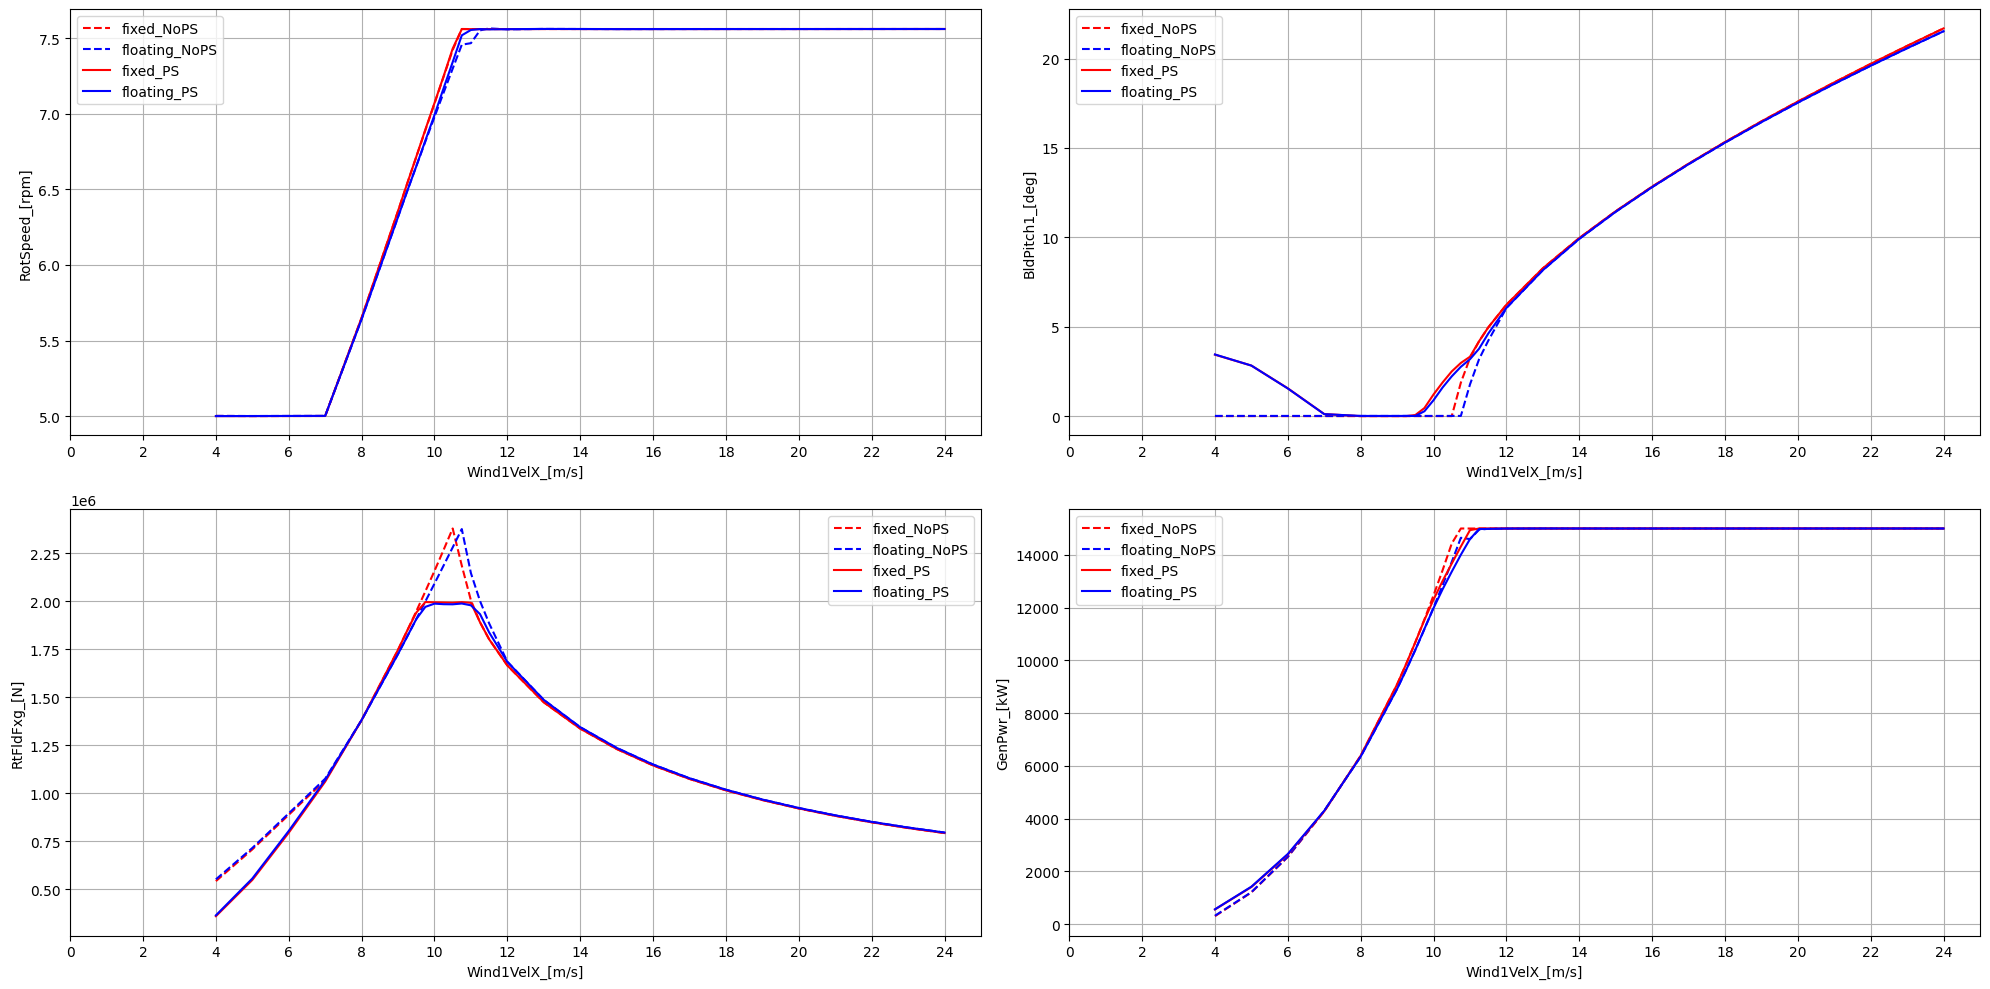

In [35]:
fig,ax = plt.subplots(2,2,figsize=(20,10))

i = 0
for axes in ax:
    for axis in axes:
        key = keys[i+1]
        plt.sca(axis)
        for df,label,style in zip(dfs,labels,styles):
            plt.plot(df[keys[0]][1:],df[key][1:],style,label=label)
        plt.xticks(np.arange(0,26,2))
        plt.xlabel(keys[0])
        plt.ylabel(key)
        plt.grid()
        plt.legend()
        i += 1
    
fig.tight_layout()

In [36]:
out_files

['IEA-15-240-RWT-UMaineSemi_NoPS_step-wind_fixed.outb',
 'IEA-15-240-RWT-UMaineSemi_NoPS_step-wind_floating.outb',
 'IEA-15-240-RWT-UMaineSemi_step-wind_fixed.outb',
 'IEA-15-240-RWT-UMaineSemi_step-wind_floating.outb']

In [37]:
from pyFAST.input_output import FASTOutputFile as fstout
out_dfs = []
for out_file in out_files:
    out_dfs.append(fstout(out_file).toDataFrame())

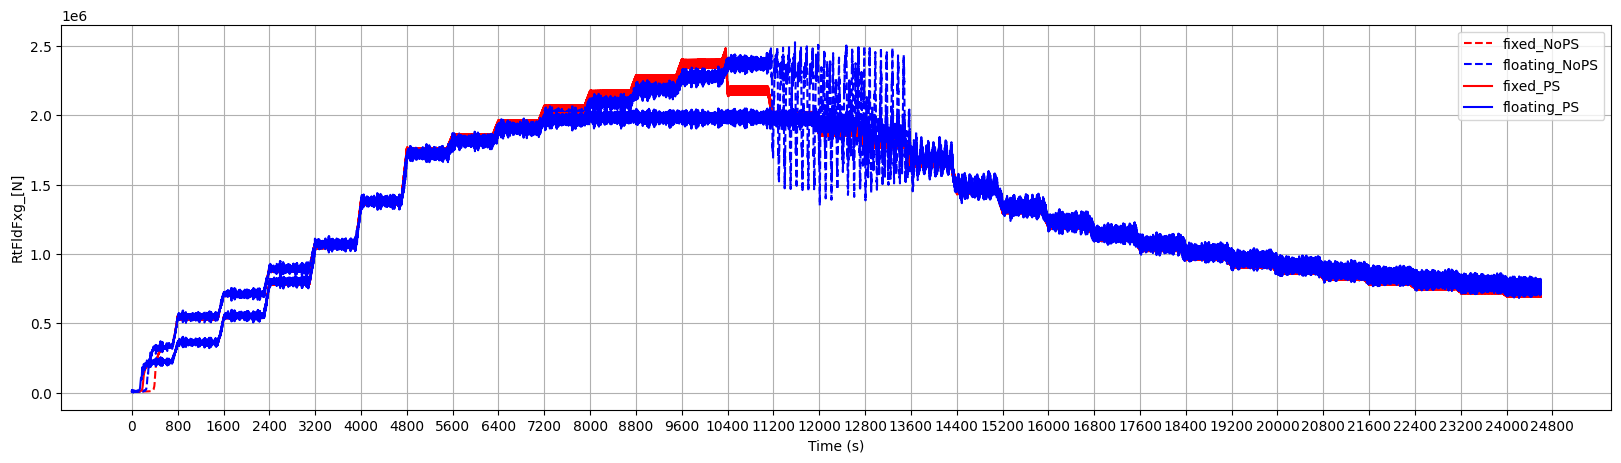

In [46]:
plt.figure(figsize=(20,5))
for df,label,style in zip(out_dfs,labels,styles):
    t = df['Time_[s]'].to_numpy()
    x = df['RtFldFxg_[N]'].to_numpy()
    plt.plot(t,x,style,label=label)
plt.xticks(np.arange(0,t[-1]+800,800))
plt.xlabel('Time (s)')
plt.ylabel('RtFldFxg_[N]')
# plt.xlim(t.max()-10,t.max())
# plt.ylim(0.5E6,1E6)
plt.grid()
plt.legend()


In [ ]:
df['W']

([<matplotlib.axis.XTick at 0x211b41f8bb0>,
 [Text(0.0, 0, '0'),
  Text(800.0, 0, '800'),
  Text(1600.0, 0, '1600'),
  Text(2400.0, 0, '2400'),
  Text(3200.0, 0, '3200'),
  Text(4000.0, 0, '4000'),
  Text(4800.0, 0, '4800'),
  Text(5600.0, 0, '5600'),
  Text(6400.0, 0, '6400'),
  Text(7200.0, 0, '7200'),
  Text(8000.0, 0, '8000'),
  Text(8800.0, 0, '8800'),
  Text(9600.0, 0, '9600'),
  Text(10400.0, 0, '10400'),
  Text(11200.0, 0, '11200'),
  Text(12000.0, 0, '12000'),
  Text(12800.0, 0, '12800'),
  Text(13600.0, 0, '13600'),
  Text(14400.0, 0, '14400'),
  Text(15200.0, 0, '15200'),
  Text(16000.0, 0, '16000'),
  Text(16800.0, 0, '16800'),
  Text(17600.0, 0, '17600'),
  Text(18400.0, 0, '18400'),
  Text(19200.0, 0, '19200'),
  Text(20000.0, 0, '20000'),
  Text(20800.0, 0, '20800'),
  Text(21600.0, 0, '21600'),
  Text(22400.0, 0, '22400'),
  Text(23200.0, 0, '23200'),
  Text(24000.0, 0, '24000'),
  Text(24800.0, 0, '24800')])

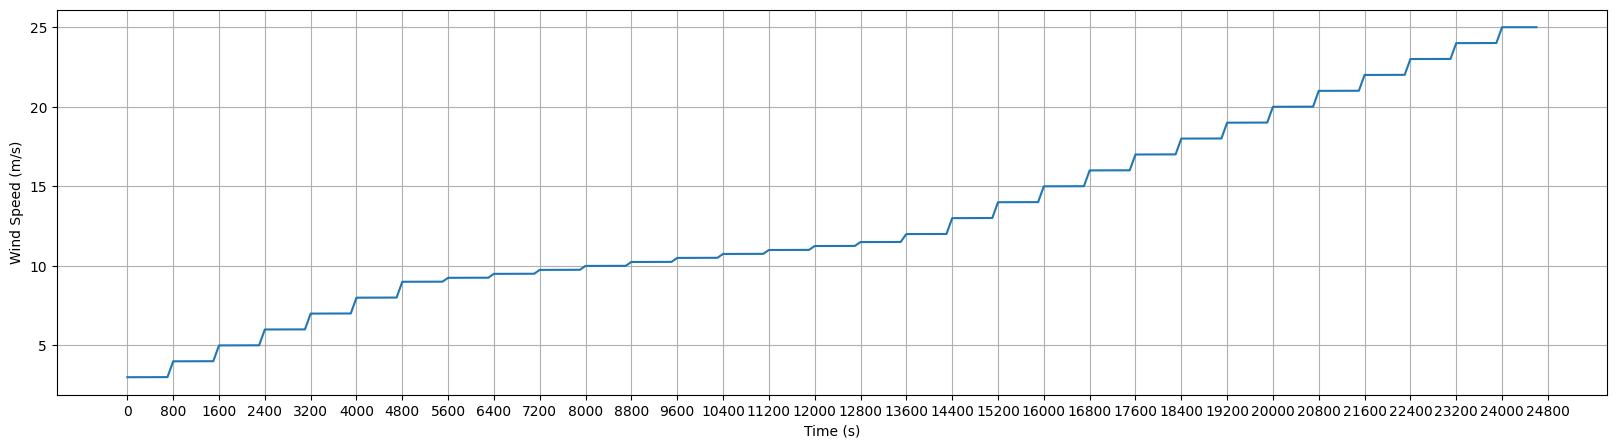

In [44]:
plt.figure(figsize=(20,5))
t = out_dfs[0]['Time_[s]'].to_numpy()
x = out_dfs[0]['Wind1VelX_[m/s]'].to_numpy()
plt.plot(t,x)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(np.arange(0,t[-1]+800,800))
